## **Representação das treliças no plano**

**Importações:**

       from anastruct import SystemElements

**Principais passos a serem seguidos toda vez que contruírmos um elemento de treliça:**

- Identificar as reações externas (que terão valores conhecidos)
- Identificar as **coordenadas dos nós**
- Declarar por meio de nomes os nós 
- Estimar as reações de apoio

In [60]:
import matplotlib.pyplot as plt
from anastruct import SystemElements

In [61]:
se = SystemElements() #Importação da classe

---------------------
**Exercício de apoio:**

Descobrir as reações de apoio da treliça com apoio de primeiro gênero no nó A e apoio de segundo gênero no nó C

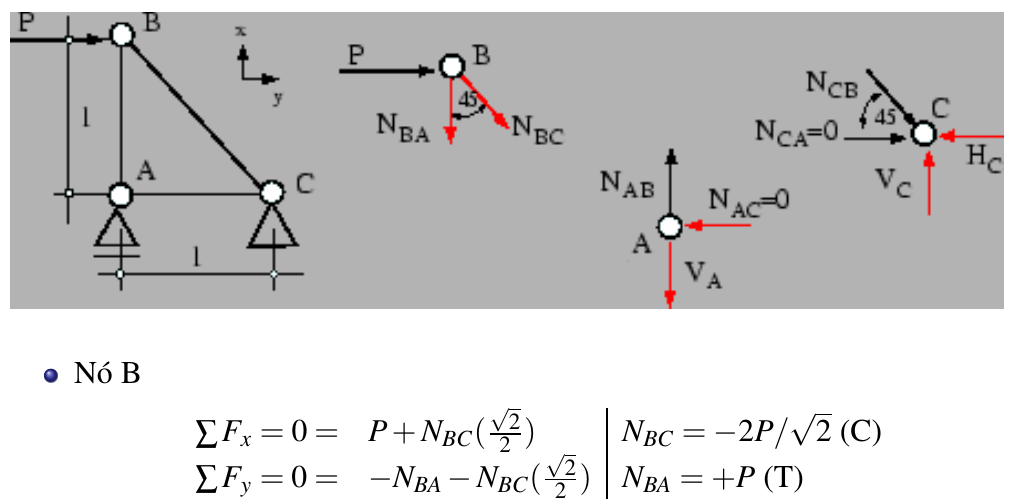

------------
**Informações sobre a classe *SystemElement***

In [62]:
help(se)

Help on SystemElements in module anastruct.fem.system object:

class SystemElements(builtins.object)
 |  SystemElements(figsize: Tuple[float, float] = (12, 8), EA: float = 15000.0, EI: float = 5000.0, load_factor: float = 1.0, mesh: int = 50)
 |  
 |  Modelling any structure starts with an object of this class.
 |  
 |  :ivar EA: Standard axial stiffness of elements, default=15,000
 |  :ivar EI: Standard bending stiffness of elements, default=5,000
 |  :ivar figsize: (tpl) Matplotlibs standard figure size
 |  :ivar element_map: (dict) Keys are the element ids, values are the element objects
 |  :ivar node_map: (dict) Keys are the node ids, values are the node objects.
 |  :ivar node_element_map: (dict) maps node ids to element objects.
 |  :ivar loads_point: (dict) Maps node ids to point loads.
 |  :ivar loads_q: (dict) Maps element ids to q-loads.
 |  :ivar loads_moment: (dict) Maps node ids to moment loads.
 |  :ivar loads_dead_load: (set) Element ids that have a dead load applied.
 

-----------------
**Criação dos nós e das conectividades entre eles (são as barras)**

    nodes are dict
    connection represent a list of tuple, where each element is the truss arms combination

In [63]:
nodes = {
        'A': (0,0), 
        'B': (0, 1), 
        'C': (1, 0)}

nodes_names = list(nodes.keys())
cncts = [(nodes_names[i], nodes_names[j]) 
        for i in range (len(nodes_names))
        for j in range(i, len(nodes_names))
       if i!=j]

cncts

[('A', 'B'), ('A', 'C'), ('B', 'C')]

----------
**Adiciona as barras na estrutura a partir da conexão entre os nós**

- Necessário uma lista com listas de coordenadas dos pontos
- Adição por meio de uma função da classe *SystemElements*

        se.add_truss_element(location = <representa um conjunto de duas coordenadas>)

In [64]:
for connection in cncts:
    element_truss = [list(nodes.get(connection[0])), list(nodes.get(connection[1]))]
    print(element_truss)
    se.add_truss_element(location = element_truss)

[[0, 0], [0, 1]]
[[0, 0], [1, 0]]
[[0, 1], [1, 0]]


------------------
**Localização dos apoios**

Os apois se localizam em nós, logo usaremos uma função que dirá em qual nó tal apoio se encontra

        reation_(name_node) = se.find_node_id(position_of_node_list)
        
        se.add_support_hinged(node_id = ...) = Reação de segundo gênero
        se.add_support_roll(node_id = ...) = Reação de segundo gênero

In [65]:
reation_A = se.find_node_id(list(nodes.get('A')))
reation_C = se.find_node_id(list(nodes.get('C')))

display(reation_A)
display(reation_C)

se.add_support_roll(node_id=reation_A)
se.add_support_hinged(node_id=reation_C)

1

3

-----------------
**Inclusão de cargas externas**

- Identificar em qual nó existe a carga 

        find_node_id -- Nesse caso o código internamente precisa identificar o nó por um valor numeral (1, 2, 3, 4, ...)
        O nome que damos aos nós são facilitadores para evitar sempre de digitar as coordenadas

- Incluir uma força externa

        se.point_load(node_id, Fx, Fy)

In [66]:
extern_force = 1

In [67]:
extern_force_loc = se.find_node_id(list(nodes.get('B')))
se.point_load(node_id=extern_force_loc, Fx=extern_force)

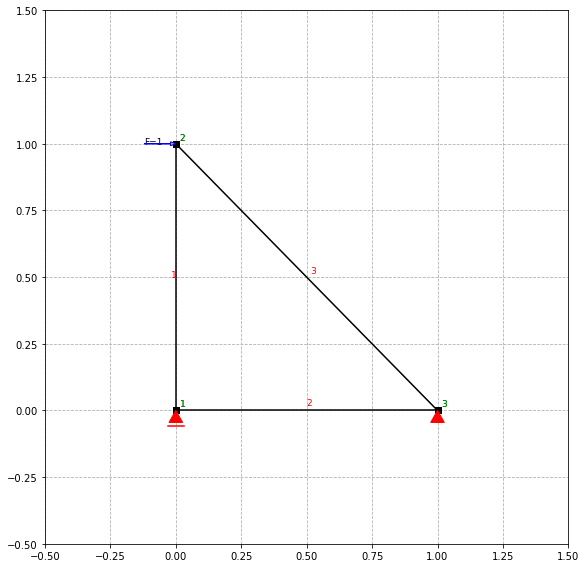

In [68]:
fig = se.show_structure(figsize=(8,8), show=False)
plt.grid(linestyle='--')
plt.show()

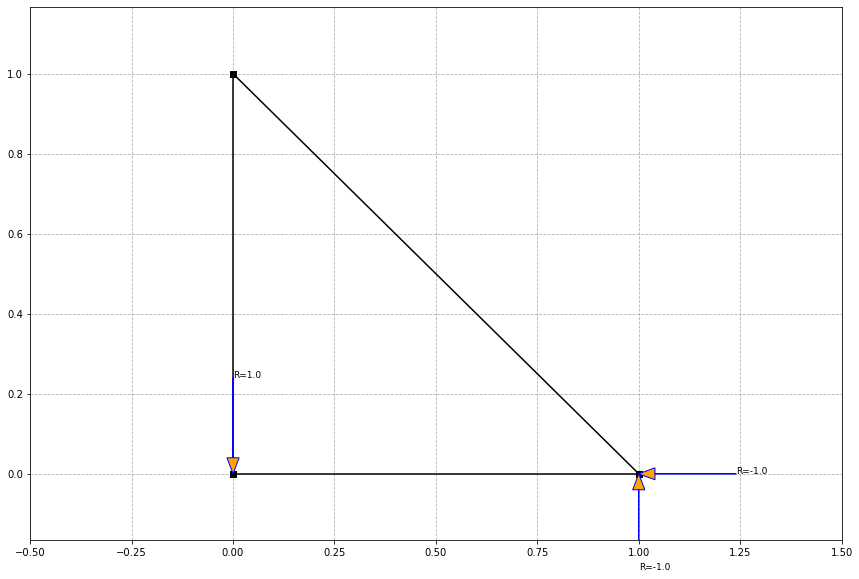

In [71]:
se.solve()
fig = se.show_reaction_force(show=False)
plt.grid(linestyle='--')
plt.show()